**# Question Q0) 1) OP1 **

In [ ]:
!pip -q install pyomo
from pyomo.environ import *
import numpy as np

In [ ]:

N , M = 5 ,6

#cost coefiicient
c = np.array([1,1,1,1,1])

#resourse constraint matrix
A = np.array([[85,92,45,27,31],
              [92, 54, 22, 20, 7],
              [96, 67, 29, 20, 11],
              [-91, -57, -33, -23, -12],
              [-99, -75, -26, -24, -41],
              [-98, -99, -57, -45, -65]])

b = np.array([1,1,1,1,1,1])

In [ ]:
#model setup
ModelOP1 = ConcreteModel()

#define decision varialbe
ModelOP1.u  = Var(np.arange(N))
ModelOP1.x = Var(np.arange(N),domain=Reals)

#add constraint
ModelOP1.constraints = ConstraintList()
[ModelOP1.constraints.add(sum(A[i][j]*ModelOP1.x[j] for j in range(N)) >= b[i]) for i in range (M)]
[ModelOP1.constraints.add(ModelOP1.x[i] <= ModelOP1.u[i])for i in range(N)]
[ModelOP1.constraints.add(ModelOP1.u[i] >= - ModelOP1.x[i]) for i in range(N)]
[ModelOP1.constraints.add(ModelOP1.u[i] >= 0) for i in range(N)]

# objective function
ModelOP1.Objective1 = Objective(expr = sum(c[i]*ModelOP1.u[i] for i in range(N)),sense = minimize)
ModelOP1.pprint()

3 Set Declarations
    constraints_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   21 : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21}
    u_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    5 : {0, 1, 2, 3, 4}
    x_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    5 : {0, 1, 2, 3, 4}

2 Var Declarations
    u : Size=5, Index=u_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :  None :  None :  None : False :  True :  Reals
          1 :  None :  None :  None : False :  True :  Reals
          2 :  None :  None :  None : False :  True :  Reals
          3 :  None :  None :  None : False :  True :  Reals
          4 :  None :  None :  None : False :  True :  Reals
    x : Size=5, Index=x_index
        Key

In [ ]:
# installing cbc solver
!apt-get install -y -qq coinor-cbc
#using CBC solver
optCBC = SolverFactory('cbc')
result = optCBC.solve(ModelOP1)

print('Solver status:', result.solver.status)
print('Solver termination condition:',result.solver.termination_condition)

Solver status: ok
Solver termination condition: optimal


In [ ]:
# Printing Optimal Solution
import pandas as pd

df = pd.DataFrame({'ui': [ModelOP1.u[i].value for i in range(N)]})
df

,ui
0,0.046449
1,0.186124
2,0.171318
3,0.000000
4,0.144065


In [ ]:
# output objective value
print("Objective Value =", ModelOP1.Objective1())

Objective Value = 0.547955725


**# Question Q0) 1) OP2**


In [ ]:
N , M = 5 ,6

#Cost coefficient Matrix
c = np.array([1,1,1,1,1])

#Vector resource constraint
A = np.array([[85,92,45,27,31],
              [92, 54, 22, 20, 7],
              [96, 67, 29, 20, 11],
              [-91, -57, -33, -23, -12],
              [-99, -75, -26, -24, -41],
              [-98, -99, -57, -45, -65]])

B = np.array([1,1,1,1,1,1])

In [ ]:
#setup model
ModelOP2 = ConcreteModel()

# define number of variable
ModelOP2.a  = Var(np.arange(N),domain = NonNegativeReals)
ModelOP2.b  = Var(np.arange(N),domain = NonNegativeReals)

#adding constarints
ModelOP2.constraints = ConstraintList()
[ModelOP2.constraints.add(sum(A[i][j]*(ModelOP2.a[j] - ModelOP2.b[j]) for j in range(N)) >= B[i]) for i in range (M)]

# define objective function
ModelOP2.Objective2 = Objective(expr = sum(c[i]*(ModelOP2.a[i] + ModelOP2.b[i]) for i in range(N)),sense = minimize)

# Model printing
ModelOP2.pprint()

3 Set Declarations
    a_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    5 : {0, 1, 2, 3, 4}
    b_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    5 : {0, 1, 2, 3, 4}
    constraints_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    6 : {1, 2, 3, 4, 5, 6}

2 Var Declarations
    a : Size=5, Index=a_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :  None :  None : False :  True : NonNegativeReals
          1 :     0 :  None :  None : False :  True : NonNegativeReals
          2 :     0 :  None :  None : False :  True : NonNegativeReals
          3 :     0 :  None :  None : False :  True : NonNegativeReals
          4 :     0 :  None :  None : False :  True : NonNegativeReals
    b : Size=5, Index=b_index
        Key : Lowe

In [ ]:
# install CBC
!apt-get install -y -qq coinor-cbc
# Use CBC to solve
optCBC = SolverFactory('cbc')
result = optCBC.solve(ModelOP2)

print('Solver status:', result.solver.status)
print('Solver termination condition:',result.solver.termination_condition)

Solver status: ok
Solver termination condition: optimal


In [ ]:
# Output Optimal values
import pandas as pd

df1 = pd.DataFrame({'ai': [ModelOP2.a[i].value for i in range(N)],
                   'bi': [ModelOP2.b[i].value for i in range(N)]})
df1

,ai,bi
0,0.000000,0.046449
1,0.186124,0.000000
2,0.000000,0.171318
3,0.000000,0.000000
4,0.000000,0.144065


In [ ]:
# printing the optimal value
print("Objective Value =", ModelOP2.Objective2())

Objective Value = 0.547955725


**QUE 1 **

In [ ]:
# installing qpsolvers from web
!pip -q install qpsolvers[open_source_solvers]
from qpsolvers import solve_qp
import numpy as np

In [ ]:
from numpy import array, dot
from qpsolvers import solve_ls

R = array([[1, 0.3615, 85.6], [1, 0.282, 91.9], [1, 0.301, 89.1], [1, 0.3862, 90.4], [1, 0.3578, 86.3], [1, 0.4413, 74.7], [1, 0.6753, 79.3], [1, 0.6777, 74.3], [1, 0.6585, 84.4], [1, 0.6702, 84.1], [1, 0.3289, 86.8], [1, 0.2473, 93.7], [1, 0.2762, 92.3], [1, 0.3222, 94], [1, 0.2792, 88.9], [1, 0.3609, 74.3], [1, 0.6187, 74], [1, 0.6176, 69.8], [1, 0.6004, 81.6], [1, 0.6119, 81]])
s = array([0.0416, 0.0312, 0.0354, 0.0331, 0.0399, 0.0501, 0.0421, 0.0507, 0.0431, 0.0437, 0.0398, 0.0274, 0.0298, 0.0261, 0.0358, 0.0504, 0.0478, 0.0549, 0.0468, 0.0478])

x_sol = solve_ls(R, s, G=None, h=None , solver="osqp")
print(f"LS solution: x = {x_sol}")

LS solution: x = [ 0.12229473  0.0055916  -0.00100157]


/usr/local/lib/python3.10/dist-packages/qpsolvers/conversions/ensure_sparse_matrices.py:38: UserWarning: Converted P to scipy.sparse.csc.csc_matrix
For best performance, build P as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(


In [ ]:
!pip install -q pyomo
from pyomo.environ import *
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from pyomo.environ import *

# Create a Custom Model
custom_model = ConcreteModel()

# Customized data
custom_R_tilde = np.array([0.3615, 0.282, 0.301, 0.3862, 0.3578, 0.4413, 0.6753, 0.6777, 0.6585, 0.6702, 0.3289, 0.2473, 0.762, 0.3222, 0.2792, 0.3609, 0.6187, 0.6176, 0.6004, 0.6119])
custom_R = np.array([85.6, 91.9, 89.1, 90.4, 86.3, 74.7, 79.8, 74.3, 84.4, 84.1, 86.8, 93.7, 92.3, 94, 88.9, 74.3, 74, 69.8, 81.6, 81])

# Define the number of observations
num_observations = 20

# Define the indices
custom_model.i = RangeSet(1, num_observations)

# Define the parameters
custom_model.b0 = Var()
custom_model.b1 = Var()
custom_model.b2 = Var()

# Define the decision variables
custom_model.u = Var(custom_model.i, domain=NonNegativeReals)
custom_model.v = Var(custom_model.i, domain=NonNegativeReals)

# Define the objective function
custom_model.obj = Objective(expr=sum(custom_model.u[i] + custom_model.v[i] for i in custom_model.i), sense=minimize)

# Define the constraints
def custom_constraint_1_rule(model, i):
    return model.u[i] >= interest_given[i-1] - (model.b0 + model.b1 * custom_R_tilde[i-1] + model.b2 * custom_R[i-1])
custom_model.custom_constraint_1 = Constraint(custom_model.i, rule=custom_constraint_1_rule)

def custom_constraint_2_rule(model, i):
    return model.v[i] >= -interest_given[i-1] + (model.b0 + model.b1 * custom_R_tilde[i-1] + model.b2 * custom_R[i-1])
custom_model.custom_constraint_2 = Constraint(custom_model.i, rule=custom_constraint_2_rule)

# Print the custom formulation
custom_model.pprint()

# Installing the CBC solver
!apt-get -q install -y -qq coinor-cbc

# Use CBC solver to solve the custom problem
opt_custom_CBC = SolverFactory('cbc')

# Solve the custom problem
result_custom_CBC = opt_custom_CBC.solve(custom_model)

# Print the custom results
print(result_custom_CBC)

# Access the optimal values of the custom decision variables and parameters
print("Optimal custom_b0 =", value(custom_model.b0))
print("Optimal custom_b1 =", value(custom_model.b1))
print("Optimal custom_b2 =", value(custom_model.b2))

# Access the optimal custom objective value
print("Minimum custom absolute deviation =", value(custom_model.obj))



1 RangeSet Declarations
    i : Dimen=1, Size=20, Bounds=(1, 20)
        Key  : Finite : Members
        None :   True :  [1:20]

5 Var Declarations
    b0 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :  None :  None : False :  True :  Reals
    b1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :  None :  None : False :  True :  Reals
    b2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :  None :  None : False :  True :  Reals
    u : Size=20, Index=i
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          1 :     0 :  None :  None : False :  True : NonNegativeReals
          2 :     0 :  None :  None : False :  True : NonNegativeReals
          3 :     0 :  None :  None : False :  True : NonNegativeReals
          4 :     0 :  None :  None : False :  True : NonNegativeReals
          5 :     0 :  No

[0.0357224  0.02878895 0.03193004 0.03012885 0.0349333  0.04792893
 0.04180152 0.04752557 0.03601532 0.03631663 0.0344654  0.02685167
 0.02835148 0.0262346  0.03223884 0.04868072 0.04808467 0.05290423
 0.03943754 0.04008355]


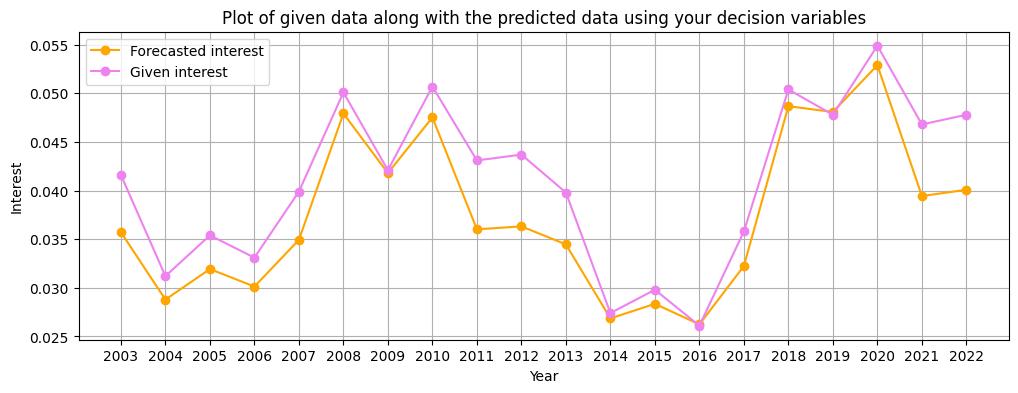

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Custom data
custom_interest_given = np.array([0.0416, 0.0312, 0.0354, 0.0331, 0.0399, 0.0501, 0.0421, 0.0507, 0.0431, 0.0437, 0.0398, 0.0274, 0.0298, 0.0261, 0.0358, 0.0504, 0.0478, 0.0549, 0.0468, 0.0478])
custom_x1 = np.array([[1, 0.3615, 85.6], [1, 0.282, 91.9], [1, 0.301, 89.1], [1, 0.3862, 90.4], [1, 0.3578, 86.3], [1, 0.4413, 74.7], [1, 0.6753, 79.3], [1, 0.6777, 74.3], [1, 0.6585, 84.4], [1, 0.6702, 84.1], [1, 0.3289, 86.8], [1, 0.2473, 93.7], [1, 0.2762, 92.3], [1, 0.3222, 94], [1, 0.2792, 88.9], [1, 0.3609, 74.3], [1, 0.6187, 74], [1, 0.6176, 69.8], [1, 0.6004, 81.6], [1, 0.6119, 81]])
custom_x2 = np.array([0.13518607, -0.00364629, -0.00114656])
custom_Year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

# Perform custom matrix multiplication
custom_result = custom_x1 @ custom_x2
print(custom_result)

# Create a custom plot
plt.figure(figsize=(12, 4))
plt.plot(custom_Year, custom_result, marker='o', linestyle='-', color='orange', label='Forecasted interest')
plt.plot(custom_Year, custom_interest_given, marker='o', linestyle='-', color='violet', label='Given interest')
plt.title('Plot of given data along with the predicted data using your decision variables')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Interest')
plt.xticks(custom_Year)
plt.grid(True)

# Show the custom plot
plt.show()

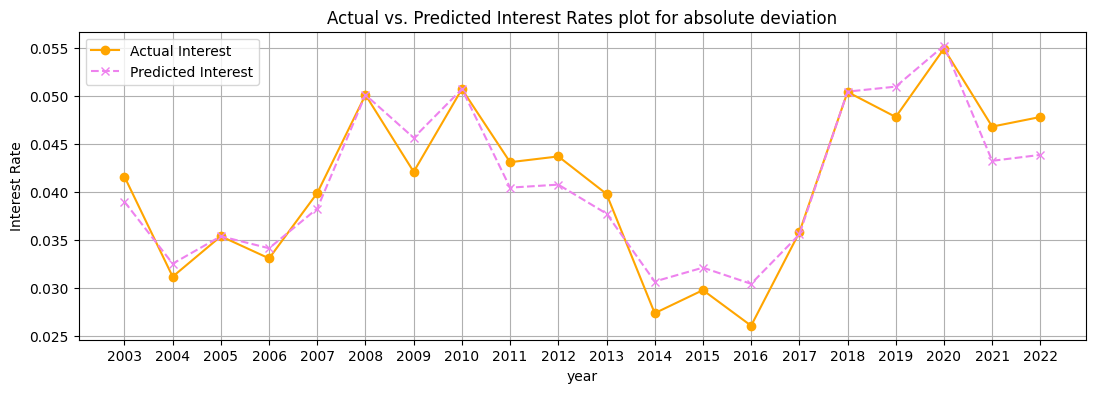

In [ ]:
import matplotlib.pyplot as plt

y = np.array([0.12539248,0.00082436291,-0.0010128015])

predicted_interest = custom_x1@y    #this gives the value of predicted interest at different year

# Plotting the data
plt.figure(figsize=(13, 4))
plt.plot(Year, interest_given, marker='o', linestyle='-', color='Orange', label='Actual Interest')
plt.plot(Year, predicted_interest, marker='x', linestyle='--', color='violet', label='Predicted Interest')
plt.xlabel('year')
plt.ylabel('Interest Rate')
plt.title('Actual vs. Predicted Interest Rates plot for absolute deviation')
plt.legend()
plt.xticks(Year)
plt.grid(True)
plt.show()

**QUE 2 **

In [ ]:
!pip -q install qpsolvers[open_source_solvers]
from qpsolvers import solve_qp
import numpy as np

# P represents quadratic cost coefficients
P = np.array([[12.982, 0, 0, 0],
            [0, 2.4, 0, 0],
            [0, 0, 0.44, -0.051],
            [0, 0, -0.051,0.068]])
# q represents linear cost coefficients
q = np.array([-6748, -1184, -420.625, -70.41]) # it will be an array


# G matrix representation of coefficients of inequality constraints
G = np.array([[-25.964, -96, -7.08, 0.025],
            [-58.419, -2.4, -5.56, 17.39],
            [1, 0, 0, 0],
            [0, 1, 0, 0],
            [0, 0, 0.22, -0.025],
            [0, 0, -0.026,0.034]])
# h vector representation of capacity bounds for inequality constraints
h = np.array([59861805, 74921464, 1039.59, 986.66, 420.625,70.41]) # it will be an array

p=solve_qp(P, q, G, h, None, None, None, None,solver="osqp")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.0/459.0 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 959.9/959.9 kB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.8/452.8 kB 11.0 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/qpsolvers/conversions/ensure_sparse_matrices.py:38: UserWarning: Converted P to scipy.sparse.csc.csc_matrix
For best performance, build P as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/qpsolvers/conversions/ensure_sparse_matrices.py:38: UserWarning: Converted G to scipy.sparse.csc.csc_matrix
For best performance, build G as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(


In [ ]:
p

array([ 519.79724844,  493.33324177, 1178.42665294, 1919.26152999])

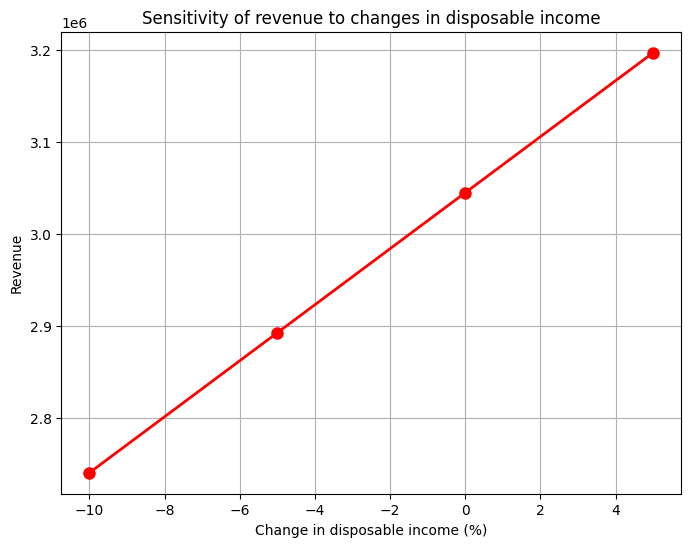

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming optimal_prices contains the optimal prices calculated previously
optimal_prices = p

# Define the range of change in disposable income (-10% to 10%)
disposable_income_change = np.arange(-0.10, 0.06, 0.05)

# Calculate revenue for each change in disposable income
revenues = []
for change in disposable_income_change:
    # Calculate new prices based on the change in disposable income
    new_prices = optimal_prices * (1 + change)
    # Calculate revenue using the new prices and last year's consumption data
    revenue = np.dot(new_prices, np.array([4820, 320, 210,70]))  # Assuming last year's consumption data for P1, P2, P3
    revenues.append(revenue)

# Plot the sensitivity curve
plt.figure(figsize=(8, 6))
plt.plot(disposable_income_change * 100, revenues, marker='o', color='r', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('Change in disposable income (%)')
plt.ylabel('Revenue')
plt.title('Sensitivity of revenue to changes in disposable income')
plt.grid(True)
plt.show()

**QUE 3 (A1) **

Pareto-Frontier Points (Return, Risk):
(0.02329635771240516, 0.020673499242195845)
(0.025185147533601387, 0.020438277480799478)
(0.024071735912466218, 0.019794593050237258)
(0.024546098321439804, 0.01975803689932704)
(0.024326873299103526, 0.0196537805469832)
(0.02429083920019085, 0.019653774309288906)
(0.0240206951881873, 0.019652900584369762)
(0.02411132873356347, 0.01965220943274332)
(0.024253457288098235, 0.01965202595605612)


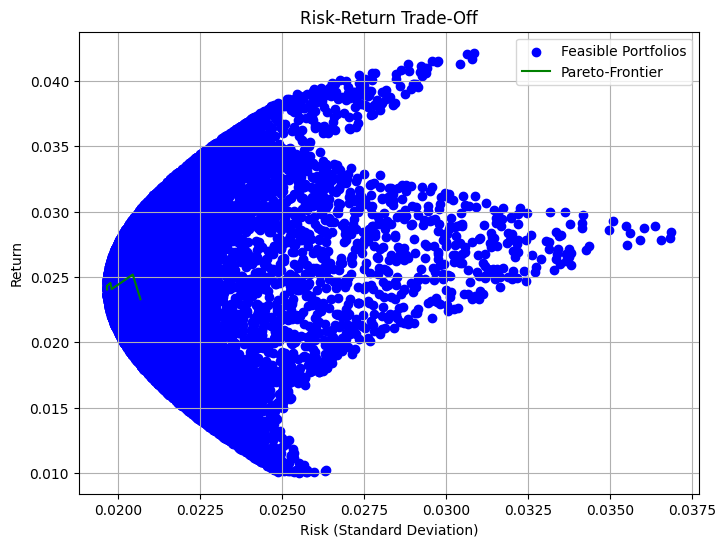

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


M = np.array([4.27, 0.15, 2.85]) / 100
Sigma = np.array([[10, 0.18, 0.11],
                  [0.12, 10.44, 0.26],
                  [0.11, 0.26, 14.11]]) / 10000

iterations = 10000

M0 = 0.01

# Random search algorithm
results = []
for _ in range(iterations):
    weights = np.random.rand(3)
    weights /= weights.sum()
    portfolio_return = np.dot(weights, M)
    portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(Sigma, weights)))
    if portfolio_return >= M0:
        results.append((portfolio_return, portfolio_risk))

# Separate the results into return and risk
return_values, risk_values = zip(*results)

# Plot the risk-return trade-off and the Pareto-Frontier
plt.figure(figsize=(8, 6))
plt.scatter(risk_values, return_values, label="Feasible Portfolios", color="blue", marker="o")
plt.xlabel("Risk (Standard Deviation)")
plt.ylabel("Return")
plt.title("Risk-Return Trade-Off")
plt.grid(True)

# Calculate Pareto-Frontier
pareto_frontier = []
min_risk = float('inf')
for r, risk in results:
    if risk < min_risk:
        pareto_frontier.append((r, risk))
        min_risk = risk

# Separate the Pareto-Frontier into return and risk
pareto_return, pareto_risk = zip(*pareto_frontier)
plt.plot(pareto_risk, pareto_return, label="Pareto-Frontier", color="green", linestyle="-")
plt.legend()

# Print Pareto-Frontier points
print("Pareto-Frontier Points (Return, Risk):")
for point in pareto_frontier:
    print(point)

plt.show()

**QUE 3 A(3)**

In [ ]:
# Q 3).A(3)

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Given data
M = np.array([4.27, 0.15, 2.85]) / 100  # Mean returns (as decimals)
Sigma = np.array([[10, 0.18, 0.11],
                  [0.12, 10.44, 0.26],
                  [0.11, 0.26, 14.11]]) / 10000  # Covariance matrix (as decimals)

# Parameters
N = 100  # Number of lambda values to consider
returns = []
risks = []

# Loop through different values of nu to calculate lambda
for nu in range(1, N + 1):
    lambda_val = 10**(5 * (nu / N) - 1)

    # Define utility function to maximize
    def utility(w):
        portfolio_return = np.dot(w, M)
        portfolio_risk = np.sqrt(np.dot(w.T, np.dot(Sigma, w)))
        return -portfolio_return + 0.5 * lambda_val * portfolio_risk**2

    # Initial guess for portfolio weights
    initial_weights = np.ones(len(M)) / len(M)

    # Constraints
    constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1},
                   {'type': 'ineq', 'fun': lambda w: w})

    # Solve the optimization problem
    result = minimize(utility, initial_weights, constraints=constraints)

    # Append results to lists
    returns.append(-result.fun)  # Negative sign due to maximization
    risks.append(np.sqrt(np.dot(result.x.T, np.dot(Sigma, result.x))))

# Plot the Pareto-Frontier trajectory
plt.figure(figsize=(10, 6))
plt.scatter(risks, returns, marker='o', label='Pareto-Frontier', color='yellow')
plt.xlabel('Standard_deviation of risk')
plt.ylabel('Expected Return')
plt.title('Pareto-Frontier')

**QUE 3 (B)**

Text(0.5, 1.0, 'Pareto-Frontier')

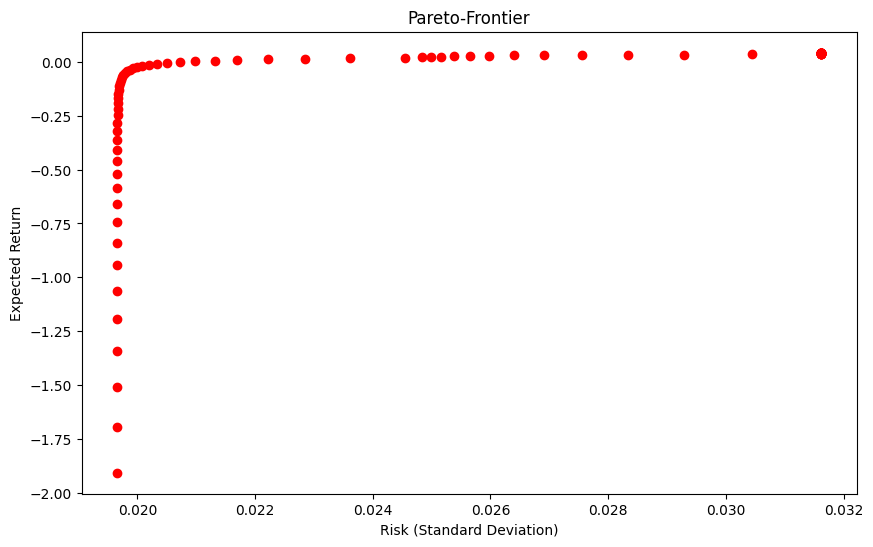

In [ ]:
import cvxpy as cp
import numpy as np

# Given data
tax_base = np.array([34329, 3269, 811, 702, 2935, 30809, 4200])
coefficients = np.array([
    [12.61, 0.108, 0],
    [10.16, 0.020, 0.276],
    [10.97, 0.044, 0],
    [9.79, 0.027, 0.102],
    [10.37, 0.036, 0],
    [11.89, 0.160, 0],
    [211.09, 0.112, 0]
])
variance_covariance = np.array([
    [0.00070, -0.00007, 0.00108, -0.00002, 0.00050, 0.00114, 0.00105],
    [-0.00007, 0.00115, 0.00054, -0.00002, 0.00058, -0.00055, 0.00139],
    [0.00108, 0.00054, 0.00279, 0.00016, 0.00142, 0.00112, 0.00183],
    [-0.00002, -0.00002, 0.00016, 0.00010, 0.00009, -0.00007, -0.00003],
    [0.00050, 0.00058, 0.00142, 0.00009, 0.00156, 0.00047, 0.00177],
    [0.00114, -0.00055, 0.00112, -0.00007, 0.00047, 0.00274, 0.00177],
    [0.00105, 0.00139, 0.00183, -0.00003, 0.00177, 0.00177, 0.00652]
])

# Constraints
T = 3300  # Total expected tax revenue
u = np.array([2 * base for base in tax_base])  # Upper bounds

# Solve the optimization problem for g = 9%
g_values = [0.09, 0.13]  # Growth rates
for g in g_values:
    x = cp.Variable(len(tax_base))
    Q = cp.quad_form(x, variance_covariance)
    objective = cp.Minimize(Q)
    constraints = [x >= 0, x <= u, cp.sum(x) == T, cp.sum(x * coefficients[:, 1]) / T == g]

    problem = cp.Problem(objective, constraints)
    problem.solve()

    # Output optimal tax rates
    print(f"Optimal Tax Rates for g = {g * 100}%:")
    print("Tax Rate for Sales Tax:", x[0].value)
    print("Tax Rate for Motor Fuel Tax:", x[1].value)
    print("Tax Rate for Alcoholic Beverages Tax:", x[2].value)
    print("Tax Rate for Tobacco Tax:", x[3].value)
    print("Tax Rate for Motor Vehicle Tax:", x[4].value)
    print("Tax Rate for Personal Income Tax:", x[5].value)
    print("Tax Rate for Corporate Tax:", x[6].value)
    print("Total Tax Revenue:", T)
    print("=" * 40)

QUE 3 (B)

In [ ]:
import cvxpy as cp
import numpy as np

# Given data
M = np.array([4.27, 0.15, 2.85]) / 100  # Mean returns (as decimals)
Sigma = np.array([[10, 0.18, 0.11],
                  [0.18, 10.44, 0.26],
                  [0.11, 0.26, 14.11]]) / 10000  # Covariance matrix (as decimals)
N = 100  # Number of lambda values
num_assets = len(M)

# Initialize variables
x = cp.Variable(num_assets)  # Portfolio weights
Lambda_values = [10 ** (5 * (nu / N) - 1) for nu in range(1, N + 1)]  # Lambda values

# Define the objective function and constraints for each lambda value
optimal_portfolios = []
for idx, Lambda in enumerate(Lambda_values):
    objective = cp.Maximize(x.T @ M - Lambda * cp.quad_form(x, Sigma))
    constraints = [cp.sum(x) == 1, x >= 0]  # Sum of weights equals 1, and weights are non-negative

    # Solve the optimization problem for the current lambda value
    problem = cp.Problem(objective, constraints)
    problem.solve(solver=cp.ECOS)

    # Save the optimal portfolio weights and objective value
    optimal_portfolios.append((x.value, problem.value))

# Print the optimal portfolios for each lambda value
for idx, (portfolio, objective_value) in enumerate(optimal_portfolios):
    print(f"Optimal Portfolio for Lambda = {Lambda_values[idx]}:")
    print("Weights:", portfolio)
    print("Objective Value:", objective_value)
    print("=" * 40)

Optimal Portfolio for Lambda = 0.11220184543019636:
Weights: [9.99999999e-01 1.65382421e-10 4.27716806e-10]
Objective Value: 0.04258779814181388
Optimal Portfolio for Lambda = 0.12589254117941673:
Weights: [1.00000000e+00 1.38364384e-10 3.44727643e-10]
Objective Value: 0.042574107448344896
Optimal Portfolio for Lambda = 0.14125375446227545:
Weights: [1.00000000e+00 1.12325627e-10 2.66148246e-10]
Objective Value: 0.0425587462372361
Optimal Portfolio for Lambda = 0.15848931924611134:
Weights: [1.00000000e+00 9.00874831e-11 2.01271807e-10]
Objective Value: 0.04254151067427531
Optimal Portfolio for Lambda = 0.1778279410038923:
Weights: [1.00000000e+00 7.31615795e-11 1.55295436e-10]
Objective Value: 0.04252217205385678
Optimal Portfolio for Lambda = 0.19952623149688797:
Weights: [1.00000000e+00 6.63144886e-11 1.37214976e-10]
Objective Value: 0.04250047376390257
Optimal Portfolio for Lambda = 0.223872113856834:
Weights: [1.00000000e+00 7.17040282e-11 1.51311824e-10]
Objective Value: 0.042476